In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RandomizedSearchCV, KFold
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_gt = pd.read_csv("gas_turbines.csv")
df_gt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
df_gt.shape

(15039, 11)

In [4]:
df_gt.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [5]:
df_gt.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
df_gt.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [7]:
df_gt=df_gt.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX','TEY']]

In [8]:
df_gt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72


In [9]:
x = df_gt.iloc[:,0:-1]
x.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [10]:
y = df_gt.iloc[:,-1]
y.head()

0    114.70
1    114.72
2    114.71
3    114.72
4    114.72
Name: TEY, dtype: float64

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

<h3> Model Building </h3>

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=10,activation='ReLU'))
model.add(tf.keras.layers.Dense(10,activation='ReLU'))
model.add(tf.keras.layers.Dense(1,activation='ReLU'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [16]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=1000)

Epoch 1/50
13/13 [==============================] - 1s 17ms/step - loss: 6264.0059 - mse: 6264.0059 - mae: 74.5560 - val_loss: 1044.4253 - val_mse: 1044.4253 - val_mae: 28.7404
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 420.3986 - mse: 420.3986 - mae: 16.5606 - val_loss: 506.9740 - val_mse: 506.9740 - val_mae: 19.1561
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 455.2478 - mse: 455.2478 - mae: 17.9473 - val_loss: 257.3073 - val_mse: 257.3073 - val_mae: 12.7824
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 240.4032 - mse: 240.4032 - mae: 12.0067 - val_loss: 256.3442 - val_mse: 256.3442 - val_mae: 13.0176
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 235.9144 - mse: 235.9144 - mae: 11.7764 - val_loss: 226.0211 - val_mse: 226.0211 - val_mae: 11.1708
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 225.2506 - mse: 225.2506 - mae: 11.2005 - val_loss: 224.7406 - 

In [17]:
model.save_weights("mywt.kmw")

In [18]:
scores = model.evaluate(x_train,y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

376/376 [==============================] - 0s 1ms/step - loss: 139.1597 - mse: 139.1597 - mae: 8.6390
mse: 13915.97%


In [19]:
model.history.history.keys()

dict_keys([])

In [20]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

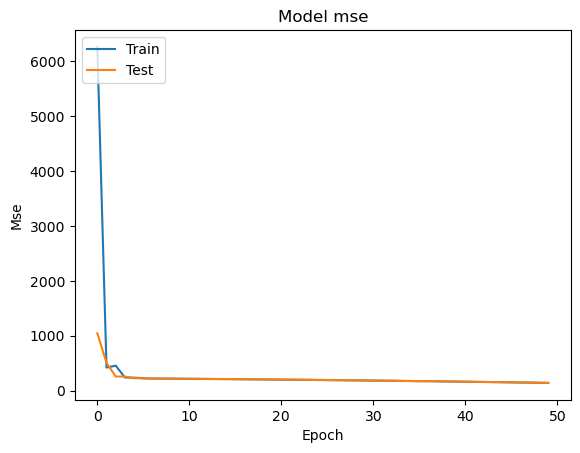

In [21]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('Mse')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

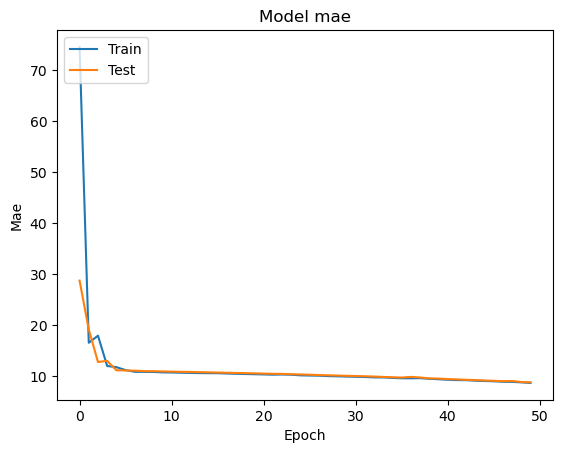

In [22]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

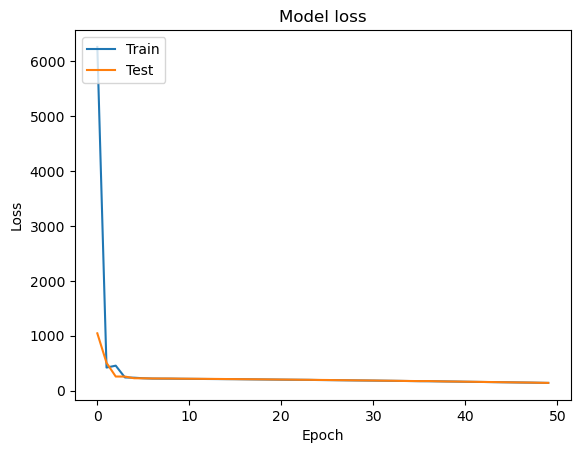

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_rmse = mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse = mean_squared_error(y_test,y_test_pred,squared=False)

print('Training set RMSE: %.3f, Testing set RMSE: %.3f' % (train_rmse,test_rmse))

94/94 [==============================] - 0s 1ms/step
Training set RMSE: 11.797, Testing set RMSE: 11.887


<h3> Randomzied SearchCV </h3>

In [25]:
def keras_reg_model(learning_rate,activation_function,init,neuron1,neuron2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(tf.keras.layers.Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse','mae'])
    return model

In [26]:
keras_reg = KerasRegressor(build_fn = keras_reg_model,verbose = 0)

In [27]:
batch_size = [10,50,100,500,1000,2000]
epochs = [25,50,80,100,150]
learning_rate = [0.001,0.01,0.1]

activation_function = ['elu','relu','linear']
init = ['uniform','normal','zero']
neuron1 = [5,10,20,30]
neuron2 = [5,10,20,30]

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

random_search = RandomizedSearchCV(estimator = keras_reg,param_distributions = param_grids,cv = 5,n_jobs=-1,verbose = 10,
                                   random_state=40)
random_result = random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [28]:
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)

Best score: -3.207149028778076
Best parameters: {'neuron2': 30, 'neuron1': 10, 'learning_rate': 0.001, 'init': 'normal', 'epochs': 50, 'batch_size': 100, 'activation_function': 'relu'}


In [29]:
d1= random_result.best_params_

keras_tuned=keras_reg_model(learning_rate=d1['learning_rate'],activation_function=d1['activation_function'],init=d1['init'],
                                                                                       neuron1=d1['neuron1'],neuron2=d1['neuron2'])

history2=keras_tuned.fit(x_train, y_train, validation_data=(x_test,y_test),
                         epochs =d1['epochs'], batch_size=d1['batch_size'])

Epoch 1/50
121/121 [==============================] - 1s 4ms/step - loss: 3279.9309 - mse: 3279.9309 - mae: 38.3650 - val_loss: 232.8918 - val_mse: 232.8918 - val_mae: 10.8398
Epoch 2/50
121/121 [==============================] - 0s 4ms/step - loss: 228.7166 - mse: 228.7166 - mae: 10.8689 - val_loss: 227.4871 - val_mse: 227.4871 - val_mae: 10.7241
Epoch 3/50
121/121 [==============================] - 0s 4ms/step - loss: 222.8575 - mse: 222.8575 - mae: 10.7087 - val_loss: 221.7250 - val_mse: 221.7250 - val_mae: 11.2367
Epoch 4/50
121/121 [==============================] - 0s 3ms/step - loss: 214.7204 - mse: 214.7204 - mae: 10.5724 - val_loss: 211.5486 - val_mse: 211.5486 - val_mae: 10.3087
Epoch 5/50
121/121 [==============================] - 0s 2ms/step - loss: 205.4800 - mse: 205.4800 - mae: 10.3201 - val_loss: 201.1111 - val_mse: 201.1111 - val_mae: 10.3128
Epoch 6/50
121/121 [==============================] - 0s 2ms/step - loss: 194.7440 - mse: 194.7440 - mae: 10.0757 - val_loss: 19

In [30]:
y_train_pred_tuned= keras_tuned.predict(x_train)
y_test_pred_tuned= keras_tuned.predict(x_test)

train_rmse_tuned = mean_squared_error(y_train,y_train_pred_tuned,squared=False)
test_rmse_tuned = mean_squared_error(y_test, y_test_pred_tuned,squared=False)

print('Training set RMSE : %.3f, Testing set RMSE: %.3f' % (train_rmse_tuned, test_rmse_tuned))

94/94 [==============================] - 0s 1ms/step
Training set RMSE : 1.350, Testing set RMSE: 1.330


In [32]:
result=pd.DataFrame({'Models':['base model','tuned model'],'Train rmse':[train_rmse,train_rmse_tuned],
                     'Test rmse':[test_rmse,test_rmse_tuned]})
result

,Models,Train rmse,Test rmse
0,base model,11.796595,11.887271
1,tuned model,1.349853,1.329866
